<a href="https://colab.research.google.com/github/Lauri-Litovuo/AI-Machine-Learning-Training/blob/main/Beginner00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the drive and dataset given

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file='/content/drive/MyDrive/Colab/Salary dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ex00

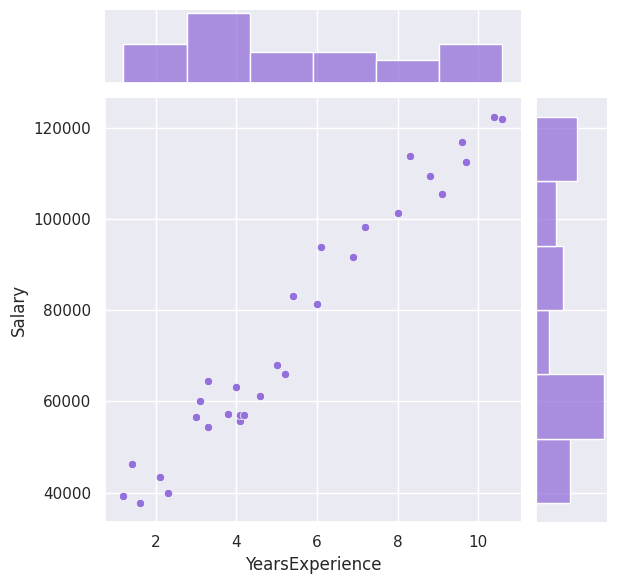

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.read_csv(file)

#Removing the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

sns.jointplot(
    data=df,
    x="YearsExperience", y="Salary", kind="scatter", color="mediumpurple"
)

EX01

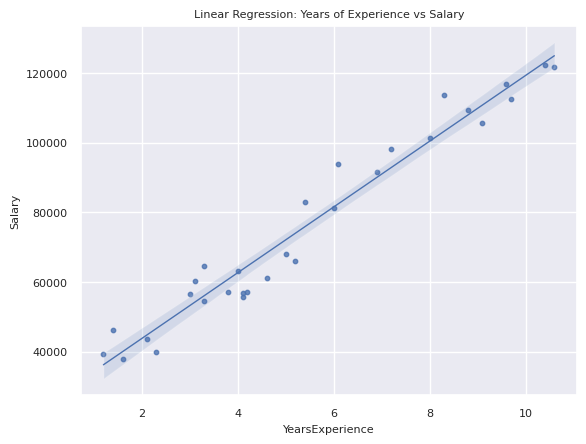

In [ ]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv(file)

X = data[['YearsExperience']]
y = data['Salary']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

sns.set_theme()
sns.set(font_scale=1)

ex01 = sns.regplot(
    data=data,
    x="YearsExperience", y="Salary", scatter_kws={'s':10}, line_kws={'linewidth':1}
)
ex01.set_title('Linear Regression: Years of Experience vs Salary', size= 8)
ex01.set_xlabel("YearsExperience", size = 8)
ex01.set_ylabel("Salary", size=8)
ex01.tick_params(labelsize=8)

EX02

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(file)

X = data[['YearsExperience']]
y = data['Salary']

#split the data to test and train, now 5% is going to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

years = [input("Give a year you want to predict: ")]
y_pred = model.predict(pd.DataFrame(years, columns=['YearsExperience']))

print(f"Predicted salary for {years[0]} years of experience is: {y_pred[0]:.2f}")

Mean Squared Error: 43144969.5828279
R-squared: 0.940087016255447
Give a year you want to predict: 15
Predicted salary for 15 years of experience is: 164869.80
